<Figure size 640x480 with 0 Axes>

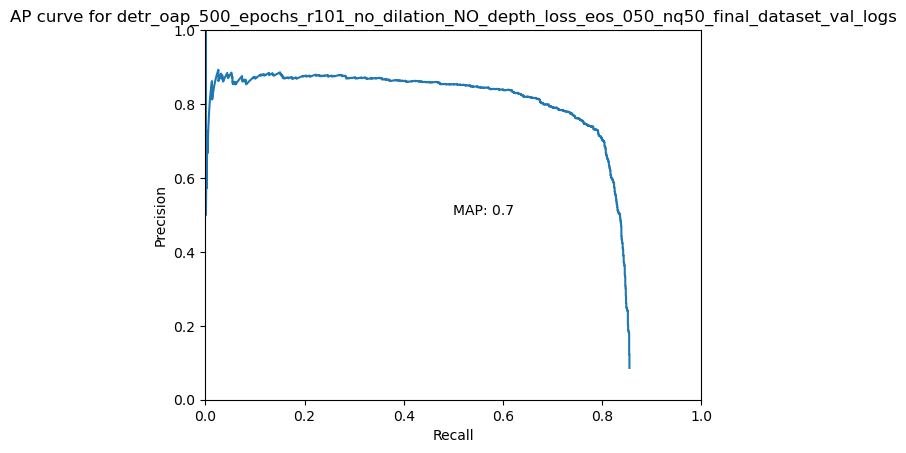

<Figure size 640x480 with 0 Axes>

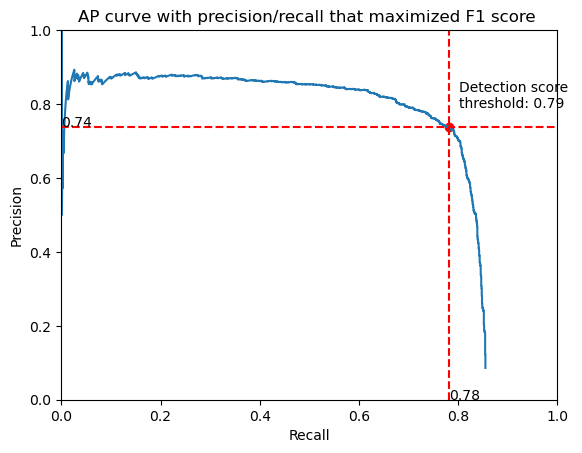

metrics for detr_oap_500_epochs_r101_no_dilation_NO_depth_loss_eos_050_nq50_final_dataset_val_logs
MAP: 0.7031060580956797
F1 score max: 0.7596741344195519
obtained for score threshold: 0.7812714576721191
with recall: 0.7819706498951782 and precision: 0.7386138613861386


<Figure size 640x480 with 0 Axes>

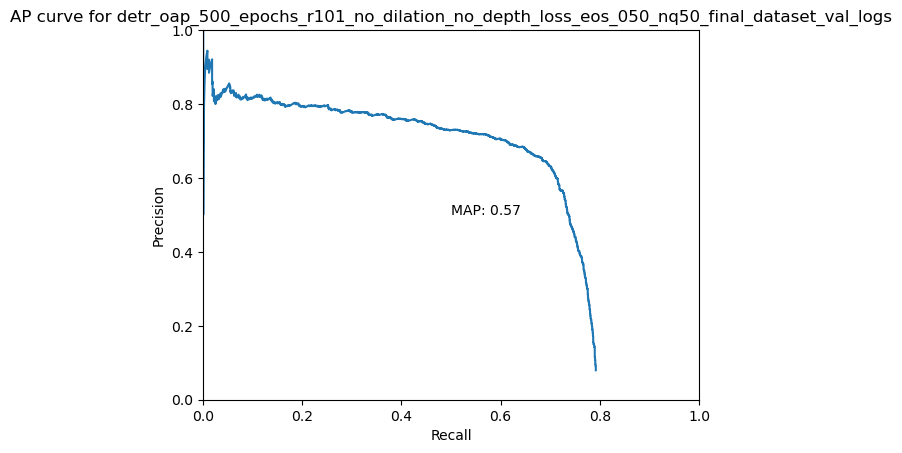

<Figure size 640x480 with 0 Axes>

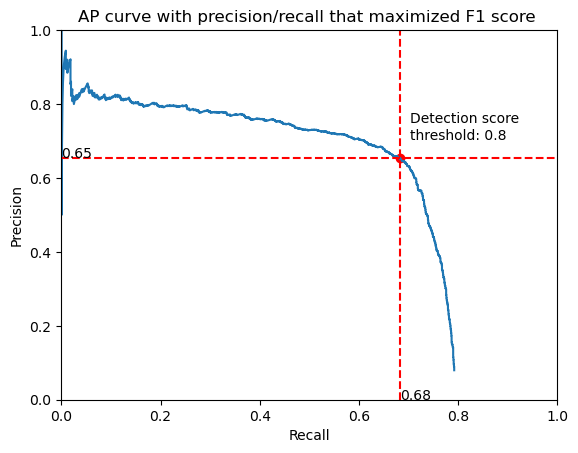

metrics for detr_oap_500_epochs_r101_no_dilation_no_depth_loss_eos_050_nq50_final_dataset_val_logs
MAP: 0.5739415469952533
F1 score max: 0.6685479733196511
obtained for score threshold: 0.7985944151878357
with recall: 0.6829140461215933 and precision: 0.6547738693467337


In [70]:
import numpy as np
import matplotlib.pyplot as plt
import glob

#cath all file in AP_logs folder
path = 'AP_logs/*.csv'
files = glob.glob(path)
nb_curves = len(files)

for file in files:
    data = np.genfromtxt(file, delimiter=',', skip_header=True)
    recall,precision = data[:,1],data[:,2]
    MAP = np.trapz(precision,recall)
    plt.figure()
    fig, ax = plt.subplots()
    ax.plot(recall, precision)
    ax.text(0.5, 0.5, f"MAP: {MAP.round(2)}")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.set_title(f"AP curve for {file[8:-11]}")
    plt.show()    
    
    plt.figure()
    fig, ax = plt.subplots()
    ax.plot(recall, precision)    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.set_title(f"AP curve with precision/recall that maximized F1 score ")
    # add the point in big (recall[argmax], precision[argmax]) to the plot
    ax.scatter(recall[argmax], precision[argmax], c='red')
    # add horizonal line on recall[argmax]
    ax.axhline(y=precision[argmax], color='r', linestyle='--')
    # add vertical line on precision[argmax]
    ax.axvline(x=recall[argmax], color='r', linestyle='--')
    # add on axis the score threshold
    ax.text(recall[argmax]+0.02, precision[argmax]+0.05, f"Detection score \nthreshold: {data[argmax,0].round(2)}")
    # add on axis the recall[argmax] on the left
    ax.text(recall[argmax], 0, recall[argmax].round(2))
    # add on axis the precision[argmax]
    ax.text(0, precision[argmax], precision[argmax].round(2))
    plt.show()

    print(f"metrics for {file[8:-11]}")
    print(f"MAP: {MAP}")
    recall,precision = data[:,1],data[:,2]
    F1 = 2*recall*precision/(recall+precision)
    argmax = np.argmax(F1)
    print(f"F1 score max: {np.max(F1)}")
    print(f"obtained for score threshold: {data[argmax,0]}")
    print(f"with recall: {recall[argmax]} and precision: {precision[argmax]}")
